      Reading#  Mote ID      H      T  Label
0            1        4  37.16  33.94      0
1            2        4  37.16  33.97      0
2            3        4  37.09  34.01      0
3            4        4  37.02  34.09      0
4            5        4  36.89  34.11      0
...        ...      ...    ...    ...    ...
5036      5037        4  46.59  23.02      0
5037      5038        4  46.62  23.03      0
5038      5039        4  46.69  23.01      0
5039      5040        4  46.75  23.03      0
5040      5041        4  46.72  23.05      0

[5041 rows x 5 columns]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1504
           1       1.00      0.78      0.88         9

    accuracy                           1.00      1513
   macro avg       1.00      0.89      0.94      1513
weighted avg       1.00      1.00      1.00      1513



AttributeError: 'tuple' object has no attribute 'setxtick_labels'

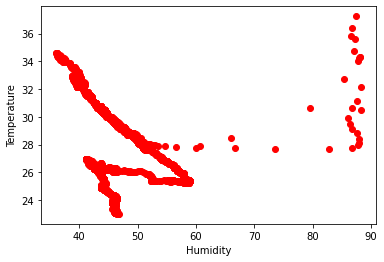

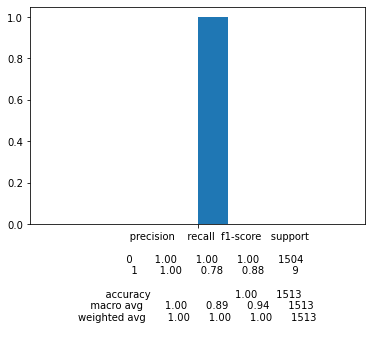

In [15]:
#The code starts here
#import the libraries that we will be using
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#libraries specific to svm
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import classification_report


#Load our CSV file - the only line of code that needs to be changed
single_hop_data = pd.read_csv('singlehop-outdoor-moteid4-data.csv')
print(single_hop_data)    #For code inspection purposes

columns_of_relevance, columns_for_training, dependent_labels = single_hop_data[['H','T','Label']], single_hop_data[['H','T']], single_hop_data['Label']
#now we need the associated values that correlates with the proper column

#recall the values method is used to list out all the values in a dictionary while not including the keys
characteristic = single_hop_data[list(columns_for_training)].values    #we converted the columns_for_training dataset into a list
dependent_labels = single_hop_data['Label'].values

#now we split the data into 70% training and 30% testing
X_train,X_test,y_train,y_test = train_test_split(characteristic, dependent_labels, test_size = 0.30)
#Now we model the SVM, we will use the svm subfucntion SVC(support vector classifier)
classifier = svm.SVC()

#now we train the model using SVM and the training dataset using the fit method
classifier.fit(X_train,y_train)
#now we predict the data using predict method which will take in the X_test values randomly selected to predict the labels based on the model trained on the code above
predicted_y_values = classifier.predict(X_test)
#now that we have the prediction, we will compared it to the actual dependent dataset for labels which will take in the (actual, predicted) parameters
#y_test represents the actual y values
print(classification_report(y_test, predicted_y_values))
#The code ends here

#plot the temperature vs Humidity graph
plt.scatter(single_hop_data['H'], single_hop_data['T'], color = 'red')
plt.xlabel('Humidity')
plt.ylabel('Temperature')
ax = plt.subplots()
plt.hist(classification_report(y_test, predicted_y_values))
ax.setxtick_labels(["singlehop-Indoor","singlehop-outdoor","multihop-indoor","multihop-outdoor"])
plt.show()



AttributeError: 'tuple' object has no attribute 'set_xticks'

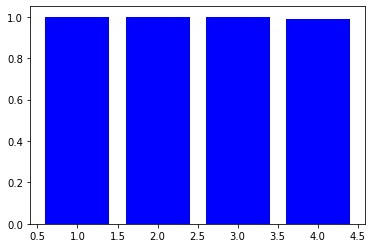

In [17]:
#data for svm: singlehop indoor, outdoor, then multihop indoor, outdoor
x = [1,2,3,4]
accuracy = [1.00, 1.00, 1.00, 0.99]

ax = plt.subplots()
#ax.set_xticks(x)
#ax.setxtick_labels(["singlehop-Indoor","singlehop-outdoor","multihop-indoor","multihop-outdoor"])
plt.bar(x, accuracy,color = "red")
plt.bar(x, accuracy, color = "blue")
ax.set_xticks(x)
["singlehop-Indoor","singlehop-outdoor","multihop-indoor","multihop-outdoor"]
plt.show()

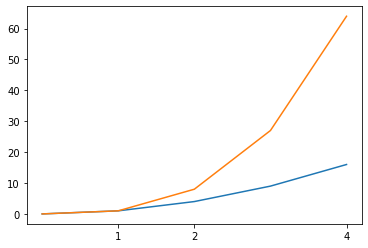

In [6]:
ax = plt.subplot()
plt.plot([0, 1, 2, 3, 4], [0, 1, 4, 9, 16])
plt.plot([0, 1, 2, 3, 4], [0, 1, 8, 27, 64])
ax.set_xticks([1, 2, 4])

Text(0, 0.5, 'accuracy')

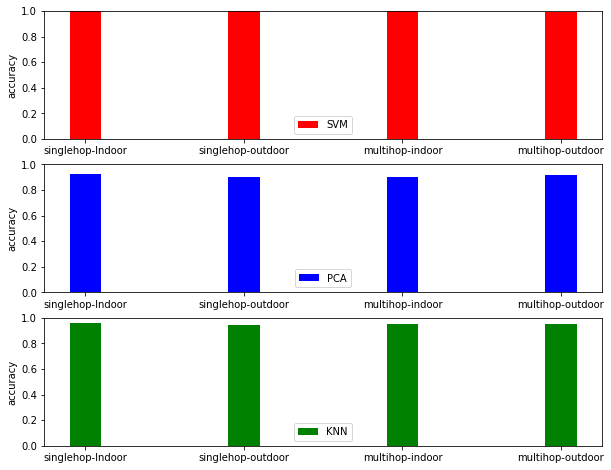

In [39]:
accuracy_svm = [1.00, 1.00, 1.00, 0.99]
x = ["singlehop-Indoor","singlehop-outdoor","multihop-indoor","multihop-outdoor"]
accuracy_pca = [0.9252, 0.9043, 0.9012, 0.9187]
accuracy_knn = [0.9572,0.941,0.9533,0.9533]

fig,ax=plt.subplots(3,1,figsize=(10,8))
ax[0].bar(x,accuracy_svm,color="red",width=0.2)
ax[0].legend(["SVM"])
ax[0].set_ylim([0,1])
plt.subplot(3,1,1)
plt.ylabel("accuracy")


ax[1].bar(x,accuracy_pca,color="blue",width=0.2)
ax[1].legend(["PCA"])
ax[1].set_ylim([0,1])
plt.subplot(3,1,2)
plt.ylabel("accuracy")


ax[2].bar(x,accuracy_knn,color="green",width=0.2)
ax[2].legend(["KNN"])
ax[2].set_ylim([0,1])
plt.ylabel("accuracy")
plt.subplot(3,1,3)
plt.ylabel("accuracy")